--------------------
## **Context**
--------------------

Hamlet is a classic written by Hamlet...
In this case study, **we will analyze the co-occurrence network of the characters in Shakespeare's Hamlet** 

The dataset is publicly available from Gutenburg Project

**Note: Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books**.

-------------------------
## **Objectives:** 
-------------------------
- Load all the raw datasets and perform descriptive analysis
- Encode lines and characters
- Calculate co-occurrence between two characters within each act
- Build Relationship table in each act
- Create simple Network Graphs using NetworkX


In [3]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path  

# Summary

#### characters

In [5]:
filepath = Path('folder/characters_df.csv') 
characters=pd.read_csv(filepath)
characters.drop(columns=["Unnamed: 0"],inplace=True)
characters.head()

,Alias,Player
0,King.,Claudius
1,Mar.,Marcellus
2,Ham.,Hamlet
3,Pol.,Polonius
4,Hor.,Horatio


#### character_line

In [6]:
filepath = Path('folder/character_line_df.csv') 
character_line=pd.read_csv(filepath)
character_line.head()

,Unnamed: 0,Alias,Player,lines
0,2,Ham.,Hamlet,358
1,0,King.,Claudius,116
2,4,Hor.,Horatio,108
3,3,Pol.,Polonius,86
4,23,Queen.,Getrude,79


#### acts

In [7]:
filepath = Path('folder/acts_df.csv') 
acts=pd.read_csv(filepath)
acts.drop(columns=["Unnamed: 0"],inplace=True)
acts.tail()

,player_lines,Act No.
4408,Exeunt marching; after the which a...,ACT V.
4409,...,ACT V.
4410,\n,ACT V.
4411,\n,ACT V.
4412,THE END\n,ACT V.


#### player_line_act

In [8]:
filepath = Path('folder/line_act_df.csv') 
player_line_act=pd.read_csv(filepath)
player_line_act.drop(columns=["Unnamed: 0"],inplace=True)
player_line_act.head()

,Player,Alias,Act I.,Act II.,Act III.,Act VI.,Act V
0,Claudius,King.,7,16,21,56,16
1,Marcellus,Mar.,32,0,0,0,0
2,Hamlet,Ham.,72,59,105,26,96
3,Polonius,Pol.,9,59,18,0,0
4,Horatio,Hor.,63,0,7,5,33


# Relationship Table

In [9]:
df=pd.DataFrame()



In [10]:
acts.head()

,player_lines,Act No.
0,ACT I. Scene I.\n,ACT I.
1,Elsinore. A platform before the Castle.\n,ACT I.
2,\n,ACT I.
3,"Enter two Sentinels-[first,] Francisco, [who p...",ACT I.
4,"at his post; then] Bernardo, [who approaches h...",ACT I.


In [11]:
act1=acts[acts["Act No."]=="ACT I."]


### N_Queens problem

#### finding Cooccurence

In [12]:
Ham_lines=[]
Ham_Mar_cooccur=[]
for i,line in enumerate(act1["player_lines"]):
    if "Ham." in line:
        Ham_lines.append(i)
        for j in range(10):
            if "Mar." in act1["player_lines"][i-10+j]:
                Ham_Mar_cooccur.append(i-10+j)
                



In [13]:
set(Ham_Mar_cooccur)

{393, 444, 459, 669, 732, 755, 904, 907, 909, 911, 915, 947, 949}

In [14]:
Ham_Hor_cooccur=[]
for i,line in enumerate(act1["player_lines"]):
    if "Ham." in line:
        Ham_lines.append(i)
        for j in range(10):
            if "Hor." in act1["player_lines"][i-10+j]:
                Ham_Hor_cooccur.append(i-10+j)
                

In [15]:
len(set(Ham_Hor_cooccur))

43

In [16]:
def co_occur(person1,person2):
    person1_lines=[]
    person1_person2_cooccur=[]
    for i,line in enumerate(act1["player_lines"]):
        if person1 in line:
            Ham_lines.append(i)
            for j in range(10):
                if person2 in act1["player_lines"][i-10+j]:
                    person1_person2_cooccur.append(i-10+j)
    return len(set(person1_person2_cooccur))

In [17]:
def co_occur(person1,person2,act=act1):
    person1_lines=[]
    person1_person2_cooccur=[]
    for i,line in enumerate(act["player_lines"]):
        if person1 in line:
            person1_lines.append(i)
            if i>10:                      #debug
                for j in range(10):
                    if person2 in act["player_lines"][i-10+j]:
                        person1_person2_cooccur.append(i-10+j)
            else:                         #debug
                for j in range(i):
                    if person2 in act["player_lines"][i-j]:
                        person1_person2_cooccur.append(i-j)
                    
    return len(set(person1_person2_cooccur))

In [18]:
personas=["Ham.","Mar.","Hor.","Ghost.","Oph.","Pol.","Laer.","King.","Queen.","Volt.","Cor.","Ber.","Fran."]
#personas=["Ham.","Mar.","Hor.","Ghost.","Oph.","Pol.","Laer.","King.","Queen.","Volt.","Cor."]
len(personas)

13

In [19]:
relationships=[]
for person1 in personas:
    for person2 in personas:
        if person1==person2:
            continue
        weight=co_occur(person1,person2)
        #print(person1+person2+str(weight))
        relationships.append((person1,person2,weight))
len(relationships)

156

#### relationship_df

In [20]:
relationship_df = pd.DataFrame(relationships,columns=['Person 1','Person 2','weight'])


In [21]:
relationship_df=relationship_df[relationship_df["weight"]!=0]
relationship_df

,Person 1,Person 2,weight
0,Ham.,Mar.,13
1,Ham.,Hor.,43
2,Ham.,Ghost.,12
4,Ham.,Pol.,1
6,Ham.,King.,4
7,Ham.,Queen.,3
10,Ham.,Ber.,1
12,Mar.,Ham.,15
13,Mar.,Hor.,29
14,Mar.,Ghost.,2


#### Visualzing each act as a network

In [22]:
G1 = nx.from_pandas_edgelist(relationship_df, 
                             'Person 1', 
                             "Person 2", 
                             edge_attr = "weight",
                             create_using = nx.Graph())



In [23]:
nx.info(G1)

/var/folders/fc/3zs433w12qd3yx2txjxbbsph0000gn/T/ipykernel_10170/968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 13 nodes and 25 edges'

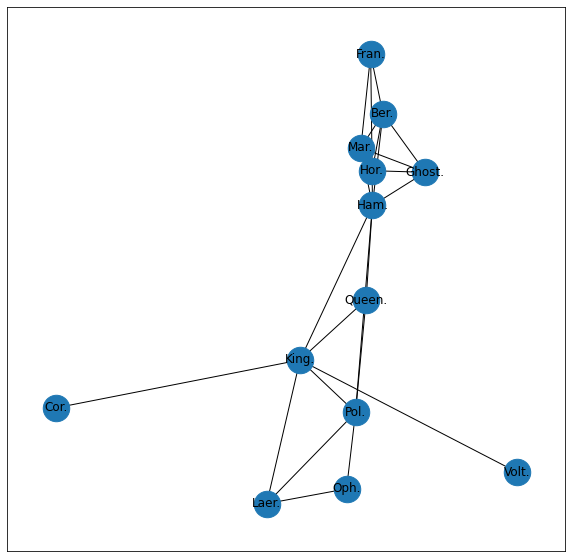

In [24]:
plt.figure(figsize=(10,10)) 
nx.draw_networkx(G1,with_labels=True,node_size=700)
plt.show()

In [25]:
relationship_df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,45.0,8.066667,10.560217,1.0,2.0,4.0,10.0,48.0


In [26]:
relationship_df["weight"][1]

43

#### Degree Measure

In [27]:
def deg_central(G):
    deg_centrality = nx.degree_centrality(G)
    
    deg_centrality_sort = sorted(deg_centrality.items(), key = lambda x:x[1], reverse = True) #sort the degree centralities of characters in decending order
    
    deg_centrality_sort = pd.DataFrame.from_dict(deg_centrality_sort)
    
    deg_centrality_sort.columns = (["Character", "Degree Centrality"])
    
    return deg_centrality_sort
deg_centrality_sort = deg_central(G1)
deg_central(G1)

,Character,Degree Centrality
0,Ham.,0.583333
1,King.,0.500000
2,Mar.,0.416667
3,Hor.,0.416667
4,Pol.,0.416667
5,Ber.,0.416667
6,Ghost.,0.333333
7,Queen.,0.250000
8,Fran.,0.250000
9,Laer.,0.250000


# Prototype function

#### materials

In [28]:
acts_index=player_line_act.columns[2:]
acts_index

Index(['Act I.', 'Act II.', 'Act III.', 'Act VI.', 'Act V'], dtype='object')

In [29]:
personas_list=[]
for act in acts_index:
    personas=player_line_act[player_line_act[act]!=0]["Alias"].values
    personas_list.append(personas)
personas_list

[array(['King.', 'Mar.', 'Ham.', 'Pol.', 'Hor.', 'Laer.', 'Volt.', 'Cor.',
        'Mar.', 'Ber.', 'Fran.', 'Queen.', 'Oph.', 'Ghost.'], dtype=object),
 array(['King.', 'Ham.', 'Pol.', 'Volt.', 'Ros.', 'Guil.', 'Rey.',
        'Queen.', 'Oph.'], dtype=object),
 array(['King.', 'Ham.', 'Pol.', 'Hor.', 'Ros.', 'Guil.', 'Queen.', 'Oph.',
        'Ghost.'], dtype=object),
 array(['King.', 'Ham.', 'Hor.', 'Laer.', 'Ros.', 'Guil.', 'Gent.',
        'Capt.', 'Queen.', 'Oph.'], dtype=object),
 array(['King.', 'Ham.', 'Hor.', 'Laer.', 'Osr.', 'Priest.', 'Clowns',
        'Fort.', 'Ambassador.', 'Queen.'], dtype=object)]

In [30]:
act1=acts[acts["Act No."]=="ACT I."]
act2=acts[acts["Act No."]=="ACT II."]
act3=acts[acts["Act No."]=="ACT III."]
act4=acts[acts["Act No."]=="ACT IV."]
act5=acts[acts["Act No."]=="ACT V."]
act_list=[act1,act2,act3,act4,act5]

#### occur()

In [31]:
def occur(person1,act):
    person1_lines=[]
    person1_person2_cooccur=[]
    for i,line in enumerate(act["player_lines"]):
        if person1 in line:
            person1_lines.append(i)
    
    return act.iloc[person1_lines]
            

In [32]:
personas=['King.', 'Ham.', 'Pol.', 'Volt.', 'Ros.', 'Guil.', 'Rey.',
        'Queen.', 'Oph.']

In [33]:
occur("Oph.",act4)

,player_lines,Act No.
3120,Oph. Where is the beauteous Majesty of Denma...,ACT IV.
3122,Oph. (sings)\n,ACT IV.
3129,"Oph. Say you? Nay, pray You mark.\n",ACT IV.
3138,Oph. Pray you mark.\n,ACT IV.
3145,Oph. (Sings)\n,ACT IV.
3151,"Oph. Well, God dild you! They say the owl wa...",ACT IV.
3155,Oph. Pray let's have no words of this; but w...,ACT IV.
3169,"Oph. Indeed, la, without an oath, I'll make ...",ACT IV.
3185,Oph. I hope all will be well. We must be pat...,ACT IV.
3304,Oph. (sings)\n,ACT IV.


#### co_occur()

In [34]:
acts[acts["Act No."]=="ACT II."]["player_lines"]

1004                              Act II. Scene I.\n
1005    Elsinore. A room in the house of Polonius.\n
1006                                              \n
1007                  Enter Polonius and Reynaldo.\n
1008                                              \n
                            ...                     
1787                                              \n
1788                                              \n
1789                                              \n
1790                                              \n
1791                                              \n
Name: player_lines, Length: 788, dtype: object

In [35]:
def co_occur(person1,person2,act=act1,n=0):
    person1_lines=[]
    person1_person2_cooccur=[]
    for i,line in enumerate(act["player_lines"]):
        if person1 in line:
            person1_lines.append(i)
            if i>10:                      #debug
                for j in range(10):
                    if person2 in act["player_lines"][i-10+j+n]:
                        person1_person2_cooccur.append(i-10+j+n)
            else:                         #debug
                for j in range(i):
                    if person2 in act["player_lines"][i-j+n]:
                        person1_person2_cooccur.append(i-j+n)
                    
    return len(set(person1_person2_cooccur))

#### relationship()

In [36]:
def relationship(personas, act=act2,n=1004):
    relationships=[]
    for person1 in personas:
        for person2 in personas:
            if person1==person2:
                continue
            weight=co_occur(person1,person2,act=act, n=n)
            #print(person1+person2+str(weight))
            relationships.append((person1,person2,weight))
    relationship_df = pd.DataFrame(relationships,columns=['Person 1','Person 2','weight'])
    relationship_df=relationship_df[relationship_df["weight"]!=0]
    return relationship_df

In [37]:
##denote the n for the beginning line of each act
[act1.head(1),act2.head(1),act3.head(1),act4.head(1),act5.head(1)]

[        player_lines Act No.
 0  ACT I. Scene I.\n  ACT I.,
             player_lines  Act No.
 1004  Act II. Scene I.\n  ACT II.,
              player_lines   Act No.
 1792  ACT III. Scene I.\n  ACT III.,
             player_lines  Act No.
 2816  ACT IV. Scene I.\n  ACT IV.,
            player_lines Act No.
 3645  ACT V. Scene I.\n  ACT V.]

In [38]:
##denoe the personas for each act
personas_list

[array(['King.', 'Mar.', 'Ham.', 'Pol.', 'Hor.', 'Laer.', 'Volt.', 'Cor.',
        'Mar.', 'Ber.', 'Fran.', 'Queen.', 'Oph.', 'Ghost.'], dtype=object),
 array(['King.', 'Ham.', 'Pol.', 'Volt.', 'Ros.', 'Guil.', 'Rey.',
        'Queen.', 'Oph.'], dtype=object),
 array(['King.', 'Ham.', 'Pol.', 'Hor.', 'Ros.', 'Guil.', 'Queen.', 'Oph.',
        'Ghost.'], dtype=object),
 array(['King.', 'Ham.', 'Hor.', 'Laer.', 'Ros.', 'Guil.', 'Gent.',
        'Capt.', 'Queen.', 'Oph.'], dtype=object),
 array(['King.', 'Ham.', 'Hor.', 'Laer.', 'Osr.', 'Priest.', 'Clowns',
        'Fort.', 'Ambassador.', 'Queen.'], dtype=object)]

# Structure the Data

In [39]:
#### The whole play
act0_df=relationship(characters["Alias"].tolist(),act=acts,n=0)

In [41]:
#### ACT I.
act1_df=relationship(['King.', 'Mar.', 'Ham.', 'Pol.', 'Hor.', 'Laer.', 'Volt.', 'Cor.',
        'Mar.', 'Ber.', 'Fran.', 'Queen.', 'Oph.', 'Ghost.'],act=act1,n=0)

In [42]:
#### ACT II.
act2_df=relationship(['King.', 'Ham.', 'Pol.', 'Volt.', 'Ros.', 'Guil.', 'Rey.',
        'Queen.', 'Oph.'],act=act2,n=1004)

In [43]:
relationship(['King.', 'Ham.', 'Pol.', 'Volt.', 'Ros.', 'Guil.', 'Rey.',
        'Queen.', 'Oph.'],act=act2,n=1004)

,Person 1,Person 2,weight
1,King.,Pol.,9
3,King.,Ros.,1
4,King.,Guil.,2
6,King.,Queen.,4
7,King.,Oph.,1
8,Ham.,King.,1
9,Ham.,Pol.,26
11,Ham.,Ros.,22
12,Ham.,Guil.,10
14,Ham.,Queen.,1


In [44]:
#### ACT III.
act3_df=relationship(['King.', 'Ham.', 'Pol.', 'Hor.', 'Ros.', 'Guil.', 'Queen.', 'Oph.',
        'Ghost.'],act=act3,n=1792)

In [45]:
#### ACT IV.
act4_df=relationship(['King.', 'Ham.', 'Hor.', 'Laer.', 'Ros.', 'Guil.', 'Gent.',
        'Capt.', 'Queen.', 'Oph.'],act=act4,n=2816)

In [46]:
#### ACT V.
act5_df=relationship(['King.', 'Ham.', 'Hor.', 'Laer.', 'Osr.', 'Priest.', 'Clowns',
        'Fort.', 'Ambassador.', 'Queen.'],act=act5,n=3645)

In [47]:
act5_df=relationship(['King.', 'Ham.', 'Hor.', 'Laer.', 'Osr.', 'Priest.', 'Clowns',
        'Fort.', 'Ambassador.', 'Queen.'],act=act5,n=3645)

In [57]:


from pathlib import Path  
filepath = Path('relationship/act5_df.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
act5_df.to_csv(filepath) 

# Visualize each Act as network 

In [48]:
G1 = nx.from_pandas_edgelist(act1_df,'Person 1',"Person 2", edge_attr = "weight", create_using = nx.Graph())
G2 = nx.from_pandas_edgelist(act2_df,'Person 1',"Person 2", edge_attr = "weight", create_using = nx.Graph())
G3 = nx.from_pandas_edgelist(act3_df,'Person 1',"Person 2", edge_attr = "weight", create_using = nx.Graph())
G4 = nx.from_pandas_edgelist(act4_df,'Person 1',"Person 2", edge_attr = "weight", create_using = nx.Graph())
G5 = nx.from_pandas_edgelist(act5_df,'Person 1',"Person 2", edge_attr = "weight", create_using = nx.Graph())


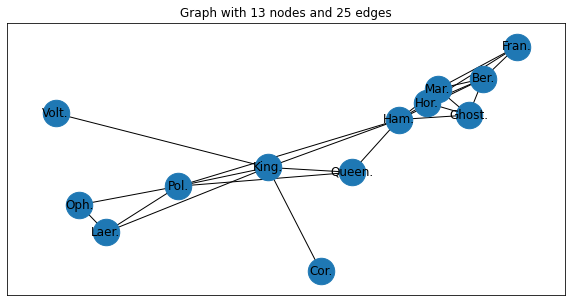

<Figure size 432x288 with 0 Axes>

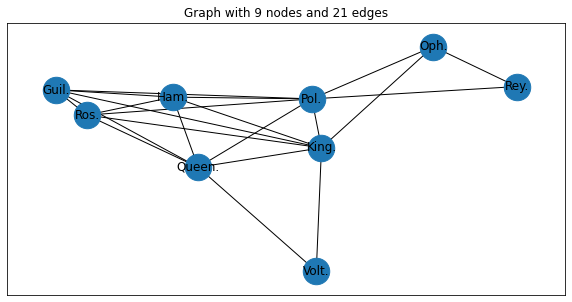

<Figure size 432x288 with 0 Axes>

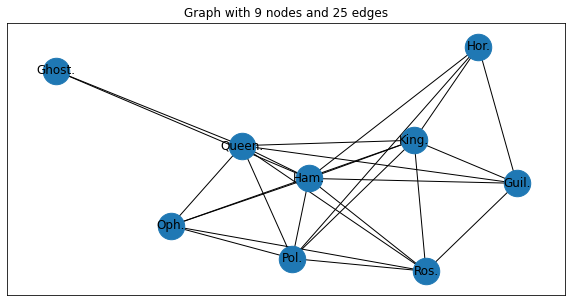

<Figure size 432x288 with 0 Axes>

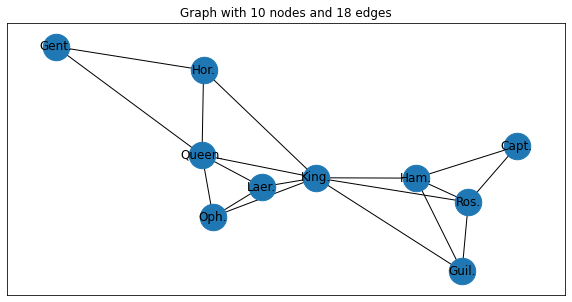

<Figure size 432x288 with 0 Axes>

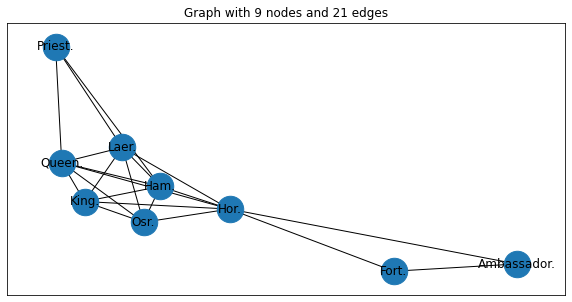

<Figure size 432x288 with 0 Axes>

In [59]:
for G in [G1,G2,G3,G4,G5]:
    plt.figure(figsize=(10,5)) 
    nx.draw_networkx(G,with_labels=True,node_size=700)
    plt.title(G)
    plt.show()


In [50]:
pd.read_csv("folder/character_identity_df.csv")

,Unnamed: 0,Player,Identity_1,Identity_2,Alias
0,0,Claudius,King of Denmark,NaN,King.
1,1,Marcellus,Officer,NaN,Mar.
2,2,Hamlet,son to the former,and nephew to the present king,Ham.
3,3,Polonius,Lord Chamberlain,NaN,Pol.
4,4,Horatio,friend to Hamlet,NaN,Hor.
5,5,Laertes,son to Polonius,NaN,Laer.
6,6,Voltemand,courtier,NaN,Volt.
7,7,Cornelius,courtier,NaN,Cor.
8,8,Rosencrantz,courtier,NaN,Ros.
9,9,Guildenstern,courtier,NaN,Guil.


In [51]:
characters["Alias"].tolist()

['King.',
 'Mar.',
 'Ham.',
 'Pol.',
 'Hor.',
 'Laer.',
 'Volt.',
 'Cor.',
 'Ros.',
 'Guil.',
 'Osr.',
 'Gent.',
 'Priest.',
 'Mar.',
 'Ber.',
 'Fran.',
 'Rey.',
 'Clowns',
 'Fort.',
 'Capt.',
 'Ambassador.',
 'Queen.',
 'Oph.',
 'Ghost.']

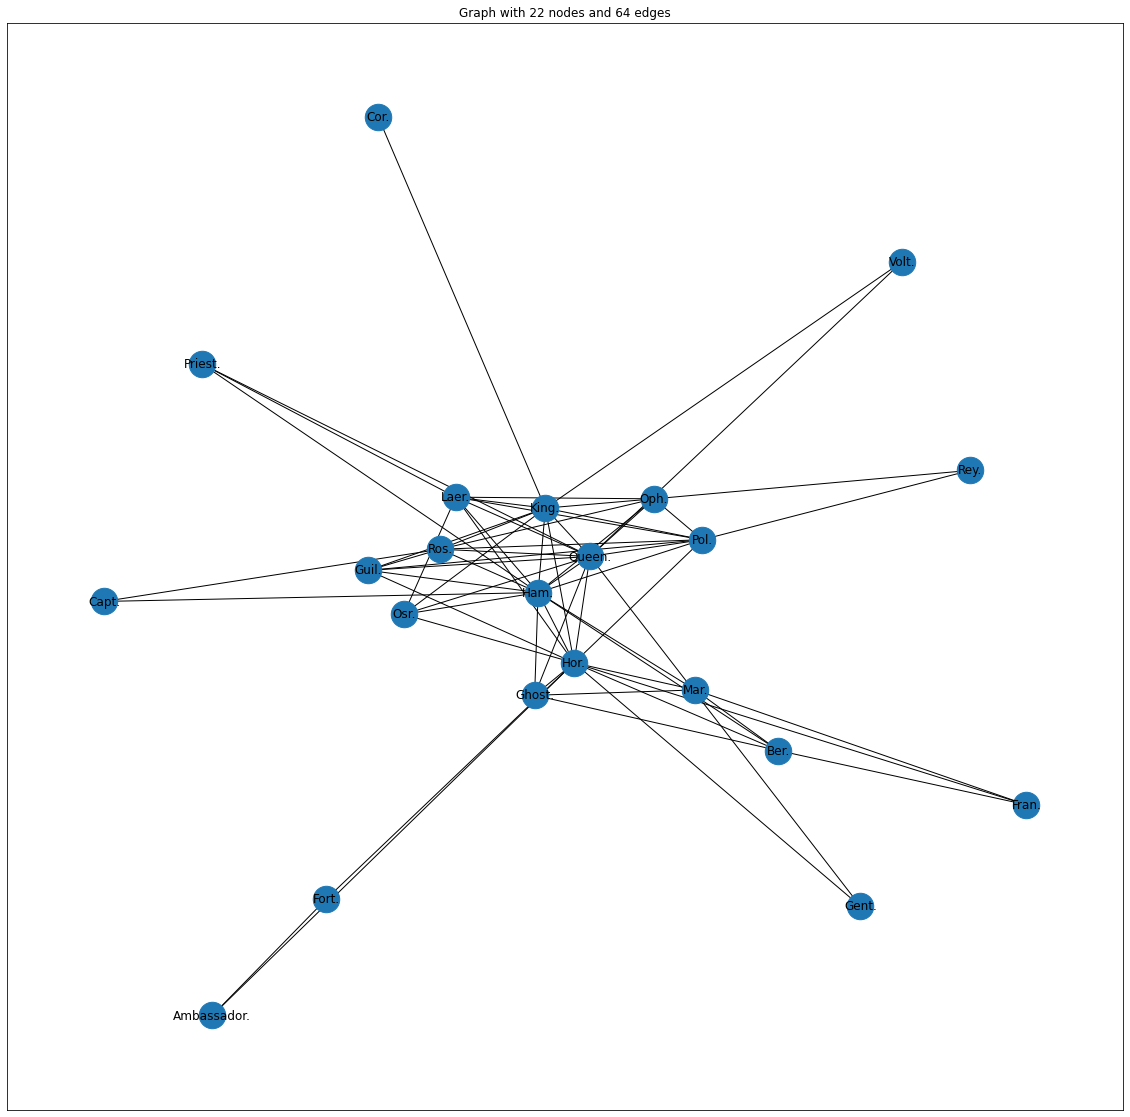

<Figure size 432x288 with 0 Axes>

In [60]:
G0 = nx.from_pandas_edgelist(act0_df,'Person 1',"Person 2", edge_attr = "weight", create_using = nx.Graph())

plt.figure(figsize=(20,20)) 
nx.draw_networkx(G0,with_labels=True,node_size=700)
plt.title(G0)
plt.show()
plt.savefig('Graph.png')

<Figure size 432x288 with 0 Axes>